Imports tensorflow

In [1]:
import tensorflow as tf

Imports the mnist dataset. The mnist dataset is a dataset of 28x28 pixel black and white images. The colour of a pixel is stored as a value between 0 (white) and 255 (black)

In [2]:
mnist = tf.keras.datasets.mnist

#loads the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train and x_test hold the images, y_train and y_test hold the labels
#Normalizes the pixel data into a value between 0 and 1 by dividing by 255
x_train, x_test = x_train/ 255.0, x_test/255.0

Creates a neural network with 1 input layer, 2 hidden layers and an output layer

In [ ]:
model = tf.keras.models.Sequential([ #the layers of the neural network are stacked on each other in sequence
  tf.keras.layers.Flatten(input_shape=(28, 28)), #Flattens the 28x28 image into a 1d array of 784 pixels. This is used as the input layer for the network
  tf.keras.layers.Dense(128, activation='relu'), #Creates a dense layer with 128 neurons. Dense means that every neuron in this layer is connected to every neuron of the previous layer. Uses the ReLU activation function
  tf.keras.layers.Dropout(0.2), #Creates a dropout layer that randomly sets 20% of the inputs to 0. This is done to prevent overfitting
  tf.keras.layers.Dense(10) #Creates a dense output layer with 10 neurons. This is to represent every number from 0-9 that can appear in the mnist dataset
])

Overfitting is an issue where networks to closely learn the training data and struggle to generalise. Dropout layers aim to fix this by randomly making some of the data in trainign redundant. This prevents the network from relying on the presence of specific neurons/pixels being present to determine its result. Dropout layers are only active during training.

Gets the models untrained predictions about the first image in the dataset

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.5160889 , -0.3795942 ,  0.19049013, -0.02380677,  0.15951344,
        -0.16106188, -0.0124263 , -0.33838674,  0.6609732 ,  0.1384132 ]],
      dtype=float32)

Converts the models untrained prediction about the first image into a probability distribution about what number it thinks it is

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.14754249, 0.06024582, 0.10653967, 0.08598909, 0.10329002,
        0.07496081, 0.08697327, 0.06278025, 0.17054522, 0.10113341]],
      dtype=float32)

A loss function, typically used for multiclass classification problems. from_logits is true because we are using raw scores instead of probabilities due to the lack of an activation function in the output layer. from_logits = True applies the above softmax function to the output layer to produce a probability distribution

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.5907898

Readies the model for training with a specified optimizer, loss function and performance metric

In [ ]:
model.compile(optimizer='adam', #popular optimization algorithm for gradient based ML
              loss=loss_fn,
              metrics=['accuracy']) #Measures the proportion of correctly classified images

In [ ]:
model.fit(te, y_train, batch_size=32, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 2s 878us/step - loss: 0.2955 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.1419 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.1075 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.0882 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.0738 - accuracy: 0.9767


In [ ]:
model.evaluate(x_test, y_test, verbose=True)

313/313 [==============================] - 0s 750us/step - loss: 0.0692 - accuracy: 0.9792


[0.06924641877412796, 0.979200005531311]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.39850909e-09, 1.89748484e-09, 4.68972075e-06, 1.20537712e-04,
        1.45180742e-10, 2.78423951e-09, 4.00607119e-13, 9.99870539e-01,
        4.10580839e-07, 3.83124279e-06],
       [2.46082266e-09, 5.57730964e-05, 9.99939919e-01, 1.25835925e-06,
        8.77295944e-14, 2.94133338e-06, 2.76466334e-08, 1.74622957e-13,
        8.02947540e-08, 1.80645158e-12],
       [1.65731296e-06, 9.98539329e-01, 2.61800596e-04, 8.23384107e-06,
        3.21473926e-05, 1.63594796e-05, 1.85486115e-05, 7.26716768e-04,
        3.91373644e-04, 3.96945870e-06],
       [9.98494864e-01, 5.11848297e-09, 1.84083183e-04, 5.59297450e-06,
        1.70087458e-06, 1.29959217e-05, 1.27447059e-03, 1.95566827e-06,
        4.00836825e-06, 2.03084528e-05],
       [1.69032483e-05, 1.48891566e-08, 1.66485206e-05, 1.06064658e-06,
        9.94844317e-01, 5.46291744e-07, 2.86162867e-05, 3.25277651e-04,
        1.04126575e-05, 4.75612050e-03]], dtype=float32)>

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2981 - accuracy: 0.9142 - val_loss: 0.1357 - val_accuracy: 0.9617
Epoch 2/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.1465 - accuracy: 0.9567 - val_loss: 0.1023 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.1079 - accuracy: 0.9668 - val_loss: 0.0872 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.0889 - accuracy: 0.9723 - val_loss: 0.0802 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.0767 - accuracy: 0.9757 - val_loss: 0.0713 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0725 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.0594 - accuracy: 0.9809 - val_loss: 0.0657 - v

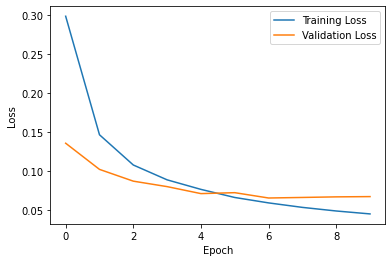

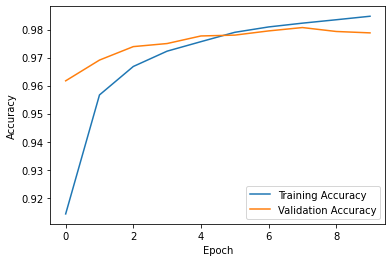

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Extract the loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss values against the number of epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy values against the number of epochs
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()